 NAME:SAHIL MEHTA
 GITHUBLINK:

In [4]:
import pandas as pd
df=pd.read_csv(r"C:\Users\sm843\Downloads\AmesHousing.csv")
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [7]:
df.head

<bound method NDFrame.head of       Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0         1  526301100           20        RL         141.0     31770   Pave   
1         2  526350040           20        RH          80.0     11622   Pave   
2         3  526351010           20        RL          81.0     14267   Pave   
3         4  526353030           20        RL          93.0     11160   Pave   
4         5  527105010           60        RL          74.0     13830   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2925   2926  923275080           80        RL          37.0      7937   Pave   
2926   2927  923276100           20        RL           NaN      8885   Pave   
2927   2928  923400125           85        RL          62.0     10441   Pave   
2928   2929  924100070           20        RL          77.0     10010   Pave   
2929   2930  924151050           60        RL          74.0      9627   Pave   

     Alle

In [9]:
from sklearn.preprocessing import StandardScaler
# --- Step 1: Drop non-informative identifier columns ---
df.drop(['Order', 'PID'], axis=1, inplace=True)

# --- Step 2: Remove columns with too many missing values (> 30%) ---
missing_ratio = df.isnull().mean()
high_missing_cols = missing_ratio[missing_ratio > 0.3].index
df.drop(columns=high_missing_cols, inplace=True)

# --- Step 3: Handle Missing Values ---
# Numerical columns: fill missing with median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Categorical columns: fill missing with mode
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# --- Step 4: Encode Categorical Variables ---
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# --- Step 5: Normalize Numerical Features ---
X = df_encoded.drop("SalePrice", axis=1)  # Features
y = df_encoded["SalePrice"]               # Target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature names and shapes for reference
print("Shape of cleaned dataset:", X_scaled.shape)
print("Number of features after encoding:", X.shape[1])


Shape of cleaned dataset: (2930, 242)
Number of features after encoding: 242


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Summary Statistics of Numerical Features ---
print("📊 Summary Statistics of Numerical Features:")
print(df[num_cols].describe())



📊 Summary Statistics of Numerical Features:
       MS SubClass  Lot Frontage       Lot Area  Overall Qual  Overall Cond  \
count  2930.000000   2930.000000    2930.000000   2930.000000   2930.000000   
mean     57.387372     69.019795   10147.921843      6.094881      5.563140   
std      42.638025     21.326422    7880.017759      1.411026      1.111537   
min      20.000000     21.000000    1300.000000      1.000000      1.000000   
25%      20.000000     60.000000    7440.250000      5.000000      5.000000   
50%      50.000000     68.000000    9436.500000      6.000000      5.000000   
75%      70.000000     78.000000   11555.250000      7.000000      6.000000   
max     190.000000    313.000000  215245.000000     10.000000      9.000000   

        Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  \
count  2930.000000     2930.000000   2930.000000   2930.000000   2930.000000   
mean   1971.356314     1984.266553    101.096928    442.604778     49.705461   
std 

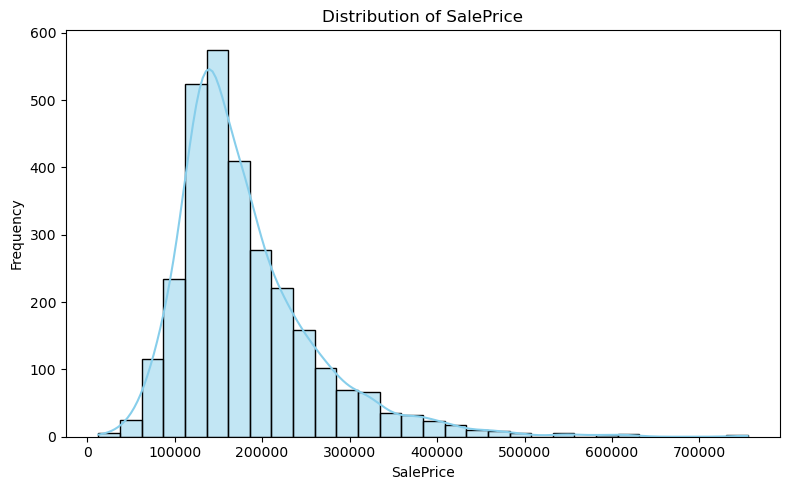

In [17]:
# --- 2. Histograms of Numeric Columns ---
plt.figure(figsize=(8, 5))
sns.histplot(df["SalePrice"], bins=30, kde=True, color='skyblue')
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

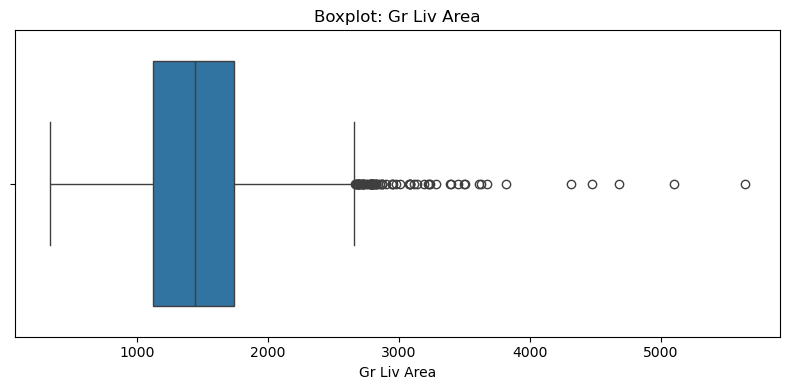

In [19]:

# --- 3. Box Plot for GrLivArea ---
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["Gr Liv Area"])
plt.title("Boxplot: Gr Liv Area")
plt.tight_layout()
plt.show()

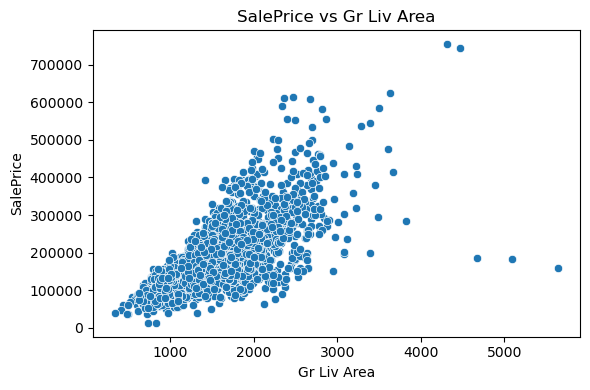

In [21]:
# SalePrice vs Gr Liv Area
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["Gr Liv Area"], y=df["SalePrice"])
plt.title("SalePrice vs Gr Liv Area")
plt.xlabel("Gr Liv Area")
plt.ylabel("SalePrice")
plt.tight_layout()
plt.show()

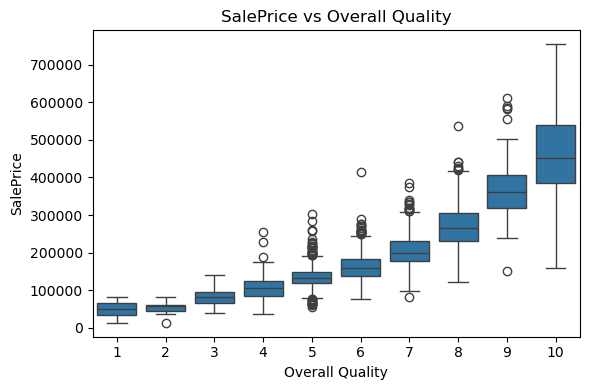

In [23]:

# SalePrice vs Overall Qual
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Overall Qual"], y=df["SalePrice"])
plt.title("SalePrice vs Overall Quality")
plt.xlabel("Overall Quality")
plt.ylabel("SalePrice")
plt.tight_layout()
plt.show()

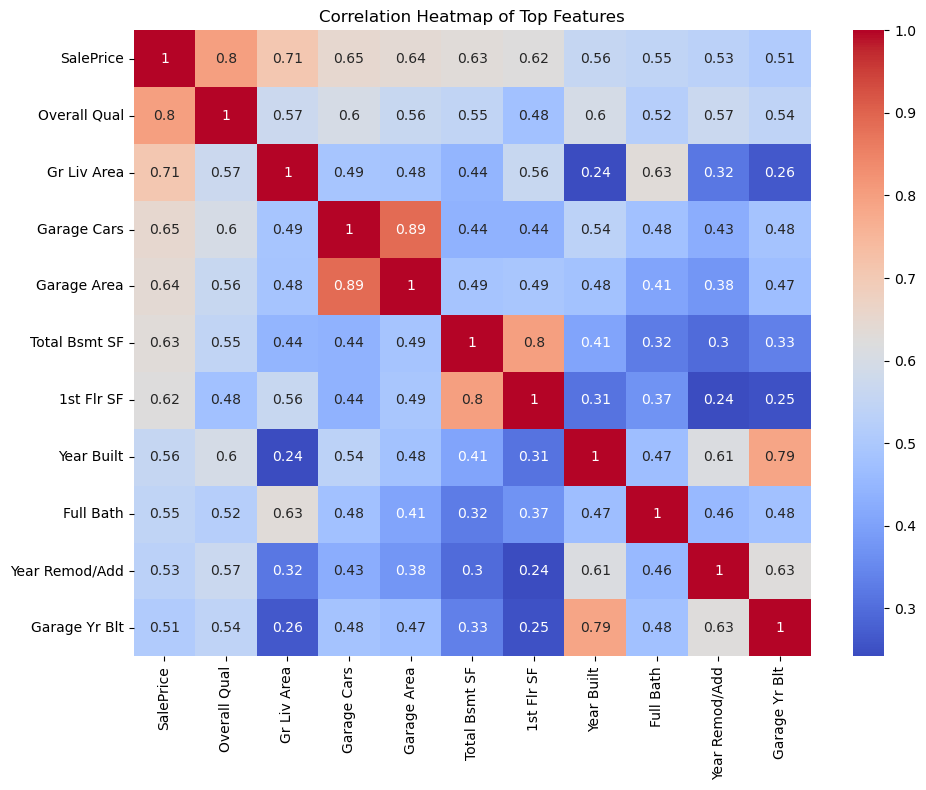

In [25]:
# --- 5. Correlation Heatmap of Top Features ---
# Get correlation matrix
correlation_matrix = df.corr(numeric_only=True)
# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_corr.index].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Top Features")
plt.tight_layout()
plt.show()

📊 Evaluation Metrics:
R-squared: -89493211874667920.0000
Mean Absolute Error (MAE): $1122389995418.35
Root Mean Squared Error (RMSE): $26786491291246.67


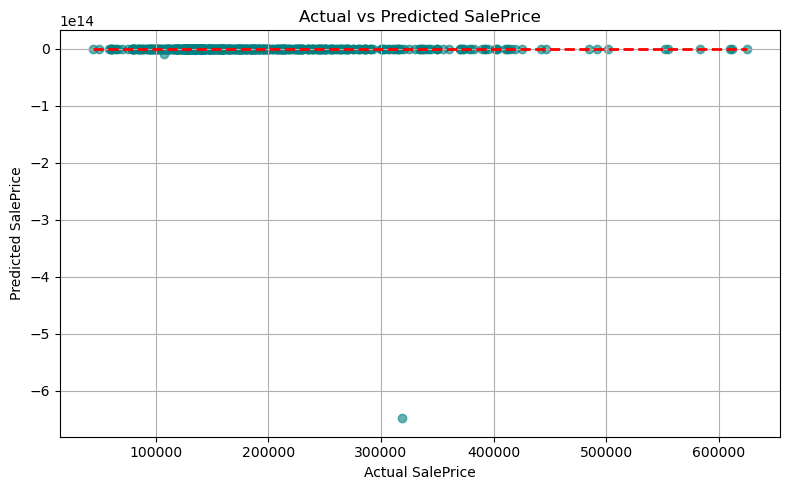

In [33]:
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Fill missing values
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include='object').columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# One-hot encoding
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Separate features and target
X = df_encoded.drop("SalePrice", axis=1)
y = df_encoded["SalePrice"]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Predict
y_pred = model.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))

# Print results
print("📊 Evaluation Metrics:")
print(f"R-squared: {r2:.4f}")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")

# Plot actual vs predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted SalePrice")
plt.grid(True)
plt.tight_layout()
plt.show()


In [35]:

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()